In [ ]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
S = 100    # число экспериментов
k = 0.3    # процент помех

xModel, xModel_otl, xModel_linear = np.zeros(S), np.zeros(S), np.zeros(S)
xObject, xObject_temp = np.zeros(S), np.zeros(S)
u1, u2, u3 = np.zeros(S), np.zeros(S), np.zeros(S)

In [ ]:
for i in range(len(xObject)):
  u1[i] = random.uniform(0, 3)
  u2[i] = random.uniform(0, 3)
  u3[i] = random.uniform(0, 3)
  sigma = random.uniform(-1, 1)

  f_u =  u1[i] - math.sin(u2[i]) - u1[i]*u3[i]
  ksi = sigma * k * f_u
  xObject[i] = ksi + f_u
  xObject_temp[i] = xObject[i]

In [ ]:
# Совпадающая
# Левая часть СЛАУ
A = np.array([
    [ sum(u1*u1),         -sum(np.sin(u2)*u1),          -sum(u1*u3*u1)], 
    [-sum(u1*np.sin(u2)),  sum(np.sin(u2)*np.sin(u2)),   sum(u1*u3*np.sin(u2))],
    [-sum(u1*u1*u3),       sum(np.sin(u2)*u1*u3),        sum(u1*u3*u1*u3)]])

# Правая часть СЛАУ
B = np.array([ sum(xObject_temp* u1), 
              -sum(xObject_temp* np.sin(u2)),
              -sum(xObject_temp* u1*u3)])
# Альфы
alpha = np.linalg.solve(A, B)
print("alpha =", alpha)


# Отличающаяся u1 -> u1^2
# Левая часть СЛАУ
A_otl = np.array([
    [ sum(u1*u1*u1),         -sum(np.sin(u2)*u1*u1),       -sum(u1*u3*u1*u1)], 
    [-sum(u1*u1*np.sin(u2)),  sum(np.sin(u2)*np.sin(u2)),   sum(u1*u3*np.sin(u2))],
    [-sum(u1*u1*u1*u3),       sum(np.sin(u2)*u1*u3),        sum(u1*u3*u1*u3)]])

# Правая часть СЛАУ
B_otl = np.array([ sum(xObject_temp* u1*u1), 
                  -sum(xObject_temp* np.sin(u2)),
                  -sum(xObject_temp* u1*u3)])
# Альфы
alpha_otl = np.linalg.solve(A_otl, B_otl)
print("alpha_otl =",alpha_otl)

# Линейная 
# Левая часть СЛАУ
A_linear = np.array([
    [ sum(u1*u1), -sum(u2*u1), -sum(u3*u1)], 
    [-sum(u1*u2),  sum(u2*u2),  sum(u3*u2)],
    [-sum(u1*u3),  sum(u2*u3),  sum(u3*u3)]])

# Правая часть СЛАУ
B_linear = np.array([ sum(xObject_temp* u1), 
                     -sum(xObject_temp* u2),
                     -sum(xObject_temp* u3)])
# Альфы
alpha_linear = np.linalg.solve(A_linear, B_linear)
print("alpha_linear =", alpha_linear)

alpha = [1.07136701 1.02878743 1.08856075]
alpha_otl = [-0.26069907 -0.0726153   0.47810562]
alpha_linear = [-0.42012753 -0.39251329  1.10853208]


In [ ]:
# Совпадающая
# Расчёт x^
temp = 0
for i in range(S):
    xModel[i] =  alpha[0] * u1[i] - alpha[1] * math.sin(u2[i]) - alpha[2] * u1[i]*u3[i]
    temp += (xObject[i] - xModel[i])
I = (1/S) * temp
print("I = : ", I)

# Отличающаяся u1 -> u1^2
temp_otl = 0
for i in range(S):
    xModel_otl[i] =  alpha_otl[0] * u1[i] * u1[i] - alpha_otl[1] * math.sin(u2[i]) - alpha_otl[2] * u1[i]*u3[i]
    temp += (xObject[i] - xModel_otl[i])
I = (1/S) * temp
print("I_otl = : ", I)

# Линейная
temp_linear = 0
for i in range(S):
    xModel_linear[i] =  alpha_linear[0] * u1[i]  - alpha_linear[1] * u2[i] - alpha_linear[2] * u3[i]
    temp += (xObject[i] - xModel_linear[i])
I = (1/S) * temp
print("I_linear = : ", I)

I = :  0.03314377960045714
I_otl = :  0.18345740824118575
I_linear = :  0.34552679818170345


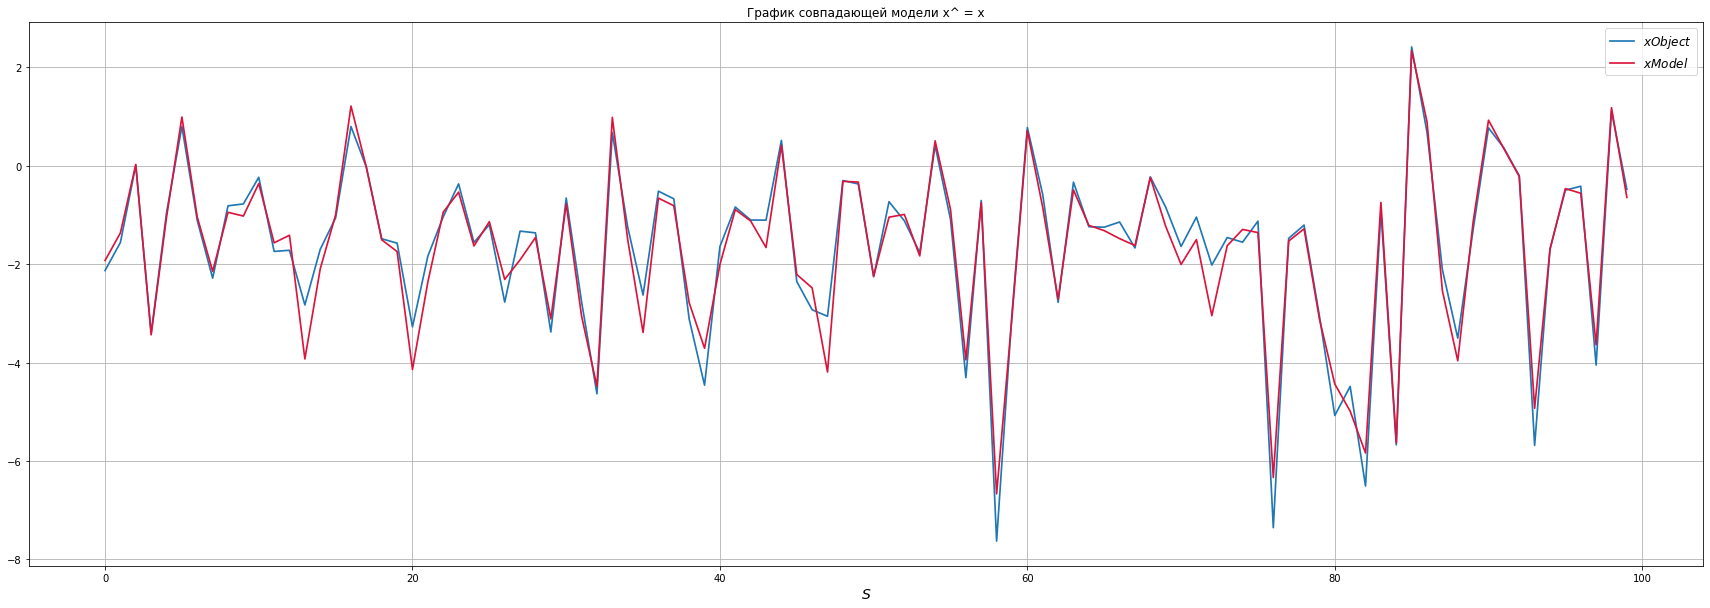

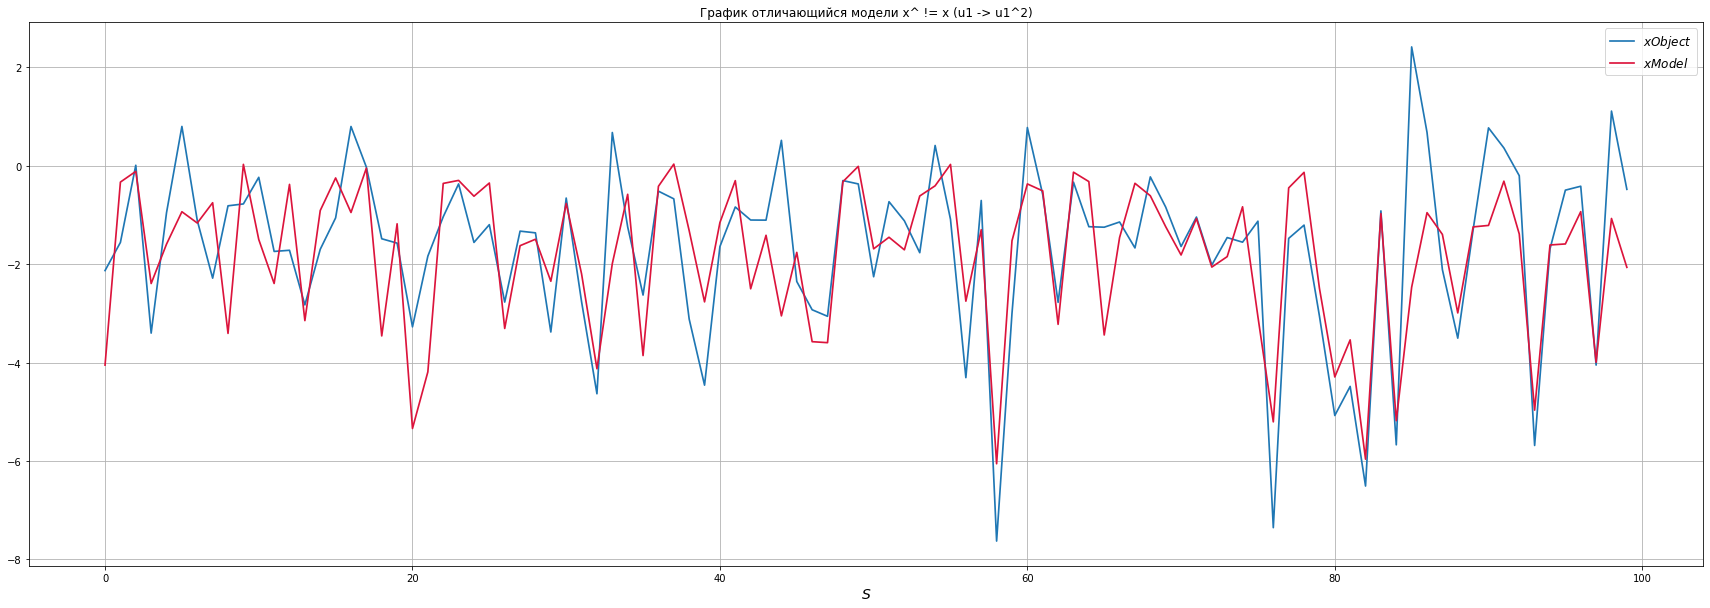

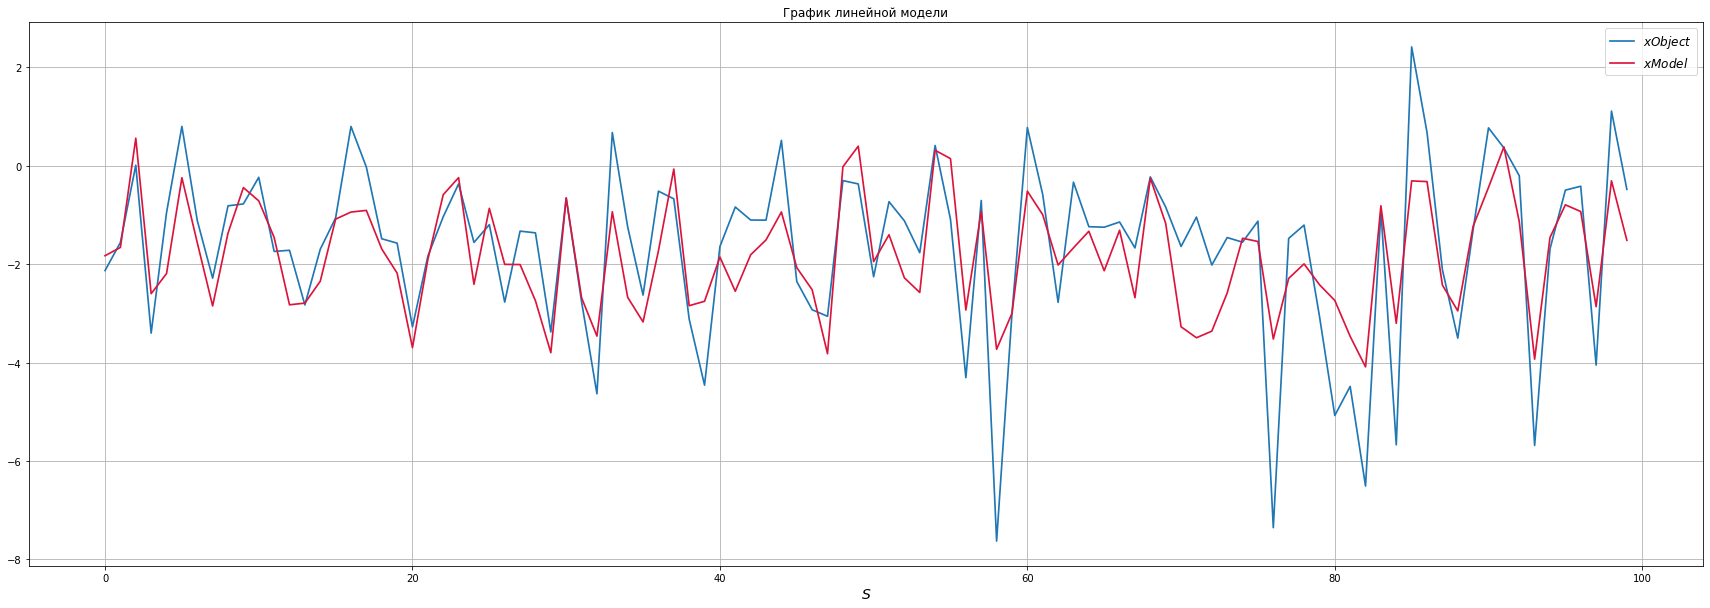

In [ ]:
# S = 0...S
s = np.zeros(S)
for i in range(S):
    s[i] += i

fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(s, xObject, linewidth=1.7, label=r'$xObject$')
ax.plot(s, xModel,  linewidth=1.7, label=r'$xModel$', color="crimson")
plt.xlabel(r'$S$', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.title('График совпадающей модели x^ = x')
plt.show()

fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(s, xObject,    linewidth=1.7, label=r'$xObject$')
ax.plot(s, xModel_otl, linewidth=1.7, label=r'$xModel$', color="crimson")
plt.xlabel(r'$S$', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.title('График отличающийся модели x^ != x (u1 -> u1^2)')
plt.show()


fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(s, xObject,       linewidth=1.7, label=r'$xObject$')
ax.plot(s, xModel_linear, linewidth=1.7, label=r'$xModel$', color="crimson")
plt.xlabel(r'$S$', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.title('График линейной модели')
plt.show()
